### This project is associated with the project-based internship program of Home Credit Indonesia.

In [1]:
# Importing the relevant libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm
from   sklearn.linear_model      import LogisticRegression
from   sklearn.preprocessing     import StandardScaler
from   sklearn.feature_selection import RFE
sns.set()

In [2]:
# Importing the dataset
dfone    = pd.read_csv('application_train.csv')
dftwo    = pd.read_csv('application_test.csv')
dfone['IDENTIFIER'] = 1
dftwo['IDENTIFIER'] = 2
df       = pd.concat([dfone, dftwo], axis = 0)
df.describe(include = 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,IDENTIFIER
count,356255.000000,307511.000000,356255,356255,356255,356255,356255.000000,3.562550e+05,3.562550e+05,356219.000000,...,356255.000000,356255.000000,356255.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,356255.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,326537,235126,235235,246970,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278128.000000,0.080729,NaN,NaN,NaN,NaN,0.414316,1.701161e+05,5.877674e+05,27425.560657,...,0.000514,0.000438,0.000289,0.005808,0.006281,0.029995,0.231697,0.304399,1.911564,1.136823
std,102842.104413,0.272419,NaN,NaN,NaN,NaN,0.720378,2.235068e+05,3.986237e+05,14732.808190,...,0.022659,0.020921,0.017001,0.079736,0.104250,0.191374,0.855949,0.786915,1.865338,0.343661
min,100001.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,189064.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16731.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278128.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.530000e+05,5.002110e+05,25078.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,367191.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,7.975575e+05,34960.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

Text(0.5, 1.0, 'Goods Price Distribution')

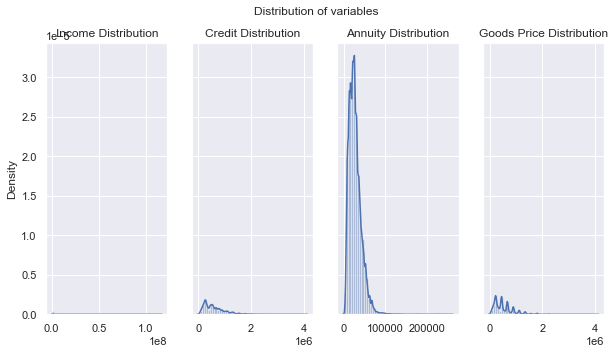

In [3]:
# Plotting distribution plots to identify outliers
fig, axes = plt.subplots(1,4, figsize=(10, 5), sharey=True)
fig.suptitle('Distribution of variables')
sns.distplot(ax = axes[0], x=df['AMT_INCOME_TOTAL'].values)
axes[0].set_title('Income Distribution')
sns.distplot(ax = axes[1], x=df['AMT_CREDIT'].values)
axes[1].set_title('Credit Distribution')
sns.distplot(ax = axes[2], x=df['AMT_ANNUITY'].values)
axes[2].set_title('Annuity Distribution')
sns.distplot(ax = axes[3], x=df['AMT_GOODS_PRICE'].values)
axes[3].set_title('Goods Price Distribution')

In [4]:
# Cleaning the dataset by removing the top 1% observation of Income, Credit, Annuity, and Goods Price
# Cleaning the dataset by removing incorrect entries of gender code
# Cleaning the dataset by removing null values
q1  = df['AMT_INCOME_TOTAL'].quantile(0.99)
q2  = df['AMT_ANNUITY']     .quantile(0.99)
q3  = df['AMT_CREDIT']      .quantile(0.99)
q4  = df['AMT_GOODS_PRICE'] .quantile(0.99)
df1 = df [df ['AMT_INCOME_TOTAL'] <  q1]
df2 = df1[df1['AMT_ANNUITY']      <  q2]
df3 = df2[df2['AMT_CREDIT']       <  q3]
df4 = df3[df3['AMT_GOODS_PRICE']  <  q4]
df5 = df4[df4['CODE_GENDER']      != 'XNA']
df_cleaned = df5.reset_index(drop = True)
df_cleaned.describe(include = 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,IDENTIFIER
count,345841.000000,298902.000000,345841,345841,345841,345841,345841.000000,345841.000000,3.458410e+05,345841.000000,...,345841.000000,345841.000000,345841.000000,299445.000000,299445.000000,299445.000000,299445.000000,299445.000000,299445.000000,345841.000000
unique,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,316978,229242,230464,240036,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278121.489491,0.081756,NaN,NaN,NaN,NaN,0.413227,162156.214197,5.616498e+05,26336.548717,...,0.000480,0.000387,0.000286,0.005797,0.006238,0.029979,0.228543,0.304266,1.920897,1.135724
std,102856.196284,0.273993,NaN,NaN,NaN,NaN,0.719572,76094.087635,3.579094e+05,12760.768192,...,0.021903,0.019680,0.016917,0.079739,0.103252,0.190981,0.848327,0.791478,1.868168,0.342496
min,100001.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,25650.000000,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,189008.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,112500.000000,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278146.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,144000.000000,4.945500e+05,24691.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,367157.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,202500.000000,7.763040e+05,33826.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

Text(0.5, 1.0, 'Goods Price Distribution')

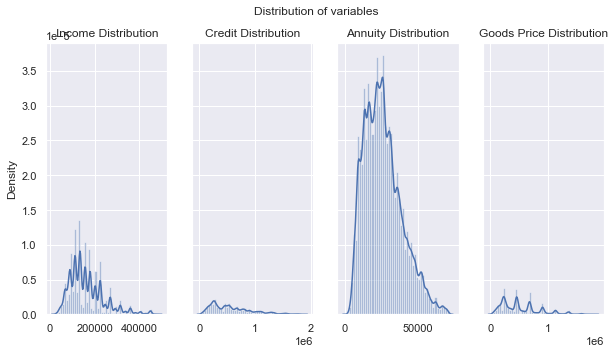

In [5]:
fig, axes = plt.subplots(1,4, figsize=(10, 5), sharey=True)
fig.suptitle('Distribution of variables')
sns.distplot(ax = axes[0], x=df_cleaned['AMT_INCOME_TOTAL'].values)
axes[0].set_title('Income Distribution')
sns.distplot(ax = axes[1], x=df_cleaned['AMT_CREDIT'].values)
axes[1].set_title('Credit Distribution')
sns.distplot(ax = axes[2], x=df_cleaned['AMT_ANNUITY'].values)
axes[2].set_title('Annuity Distribution')
sns.distplot(ax = axes[3], x=df_cleaned['AMT_GOODS_PRICE'].values)
axes[3].set_title('Goods Price Distribution')

In [6]:
# Choosing the necessary parameters and mapping categorical variables
df_chosen = df_cleaned[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'TARGET', 'IDENTIFIER']]
df_chosen['CODE_GENDER']        = df_chosen['CODE_GENDER']       .map({'M' : 1, 'F' : 0})
df_chosen['FLAG_OWN_CAR']       = df_chosen['FLAG_OWN_CAR']      .map({'Y' : 1, 'N' : 0})
df_chosen['FLAG_OWN_REALTY']    = df_chosen['FLAG_OWN_REALTY']   .map({'Y' : 1, 'N' : 0})
df_chosen

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12384\387830162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chosen['CODE_GENDER']        = df_chosen['CODE_GENDER']       .map({'M' : 1, 'F' : 0})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12384\387830162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chosen['FLAG_OWN_CAR']       = df_chosen['FLAG_OWN_CAR']      .map({'Y' : 1, 'N' : 0})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12384\387830162.py:5: SettingWithCopyWarning: 
A value is trying to

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET,IDENTIFIER
0,202500.0,406597.5,24700.5,351000.0,1,0,1,1.0,1
1,270000.0,1293502.5,35698.5,1129500.0,0,0,0,0.0,1
2,67500.0,135000.0,6750.0,135000.0,1,1,1,0.0,1
3,135000.0,312682.5,29686.5,297000.0,0,0,1,0.0,1
4,121500.0,513000.0,21865.5,513000.0,1,0,1,0.0,1
...,...,...,...,...,...,...,...,...,...
345836,121500.0,412560.0,17473.5,270000.0,0,0,1,NaN,2
345837,157500.0,622413.0,31909.5,495000.0,0,0,0,NaN,2
345838,202500.0,315000.0,33205.5,315000.0,0,1,1,NaN,2
345839,225000.0,450000.0,25128.0,450000.0,1,0,0,NaN,2


In [7]:
# Scaling the numerical data
df_chosen[['AMT_INCOME_TOTAL','AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']] = StandardScaler().fit_transform(df_chosen[['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']])
df_chosen

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12384\1609668267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chosen[['AMT_INCOME_TOTAL','AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']] = StandardScaler().fit_transform(df_chosen[['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']])


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET,IDENTIFIER
0,0.530184,-0.433217,-0.128209,-0.466408,1,0,1,1.0,1
1,1.417245,2.044802,0.733652,1.927013,0,0,0,0.0,1
2,-1.243938,-1.192063,-1.534906,-1.130479,1,1,1,0.0,1
3,-0.356877,-0.695617,0.262520,-0.632426,0,0,1,0.0,1
4,-0.534290,-0.135928,-0.350375,0.031645,1,0,1,0.0,1
...,...,...,...,...,...,...,...,...,...
345836,-0.534290,-0.416558,-0.694555,-0.715434,0,0,1,NaN,2
345837,-0.061190,0.169773,0.436726,-0.023694,0,0,0,NaN,2
345838,0.530184,-0.689141,0.538287,-0.577086,0,1,1,NaN,2
345839,0.825871,-0.311950,-0.094708,-0.162042,1,0,0,NaN,2


In [66]:
# Separating the target variables and the inputs
df_train = df_chosen[df_chosen['IDENTIFIER'] == 1]
target   = df_train['TARGET']
inputs   = df_train.drop(['TARGET', 'IDENTIFIER'], axis = 1)

In [169]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.25, random_state = 136)

In [170]:
# Creating the logistic regression model
x_train = sm.add_constant(x_train)
reg_log = sm.Logit(y_train, x_train)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.276736
         Iterations 7


In [171]:
# Summary of the model
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               224176
Model:                          Logit   Df Residuals:                   224168
Method:                           MLE   Df Model:                            7
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                 0.01845
Time:                        17:04:05   Log-Likelihood:                -62038.
converged:                       True   LL-Null:                       -63204.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.5205      0.016   -155.939      0.000      -2.552      -2.489
AMT_INCOME_TOTAL    -0.0925      0.009     -9.926      0.000      -0.111      -0.074
AMT_CREDIT           1.1663      0.044     26.249      0.000       1.079       1.253
AMT_ANNUITY          0.2179      0.013     17.276      0.000       0.193       0.243
AMT_GOODS_PRICE     -1.4213      0.047    -30.352      0.000      -1.513      -1.329
CODE_GENDER          0.5299      0.017     31.041      0.000       0.496       0.563
FLAG_OWN_CAR        -0.3051      0.018    -16.778      0.000      -0.341      -0.269
FLAG_OWN_REALTY     -0.0435      0.017     -2.588      0.010      -0.077      -0.011
====================================================================================
"""

In [172]:
# Calculating the accuracy of the model for the trained values
train_accuracy_matrix = results_log.pred_table()
train_accuracy        = (train_accuracy_matrix[0,0] + train_accuracy_matrix[1,1])/train_accuracy_matrix.sum()
print('The accuracy of the traning is', train_accuracy*100, '%')

The accuracy of the traning is 91.86978088644636 %


In [173]:
# Calculating the accuracy of the model for the tested values
x_test           = sm.add_constant(x_test)
target_test      = results_log.predict(x_test)
bins             = np.array([0, 0.5, 1])
cm               = np.histogram2d(y_test, target_test, bins = bins)[0]
test_accuracy    = (cm[0,0] + cm[1,1])/cm.sum()
print(cm)
print('The accuracy of the test is', test_accuracy*100, '%')

[[68515.     0.]
 [ 6211.     0.]]
The accuracy of the test is 91.68830126060541 %


In [174]:
# Testing with real data
df_real = df_chosen[df_chosen['IDENTIFIER'] == 2]
df_real = df_real.drop(['TARGET', 'IDENTIFIER'], axis = 1)
df_real.describe(include = 'all')

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
count,46939.000000,46939.000000,46939.000000,46939.000000,46939.000000,46939.000000,46939.000000
mean,0.099422,-0.218826,0.122869,-0.221679,0.327446,0.328618,0.690130
std,1.014482,0.866647,1.058404,0.866660,0.469287,0.469716,0.462445
min,-1.776944,-1.443524,-1.884023,-1.407175,0.000000,0.000000,0.000000
25%,-0.652564,-0.851849,-0.670928,-0.853782,0.000000,0.000000,0.000000
50%,-0.061190,-0.340617,-0.059444,-0.438738,0.000000,0.000000,1.000000
75%,0.530184,0.190971,0.732594,0.183828,1.000000,1.000000,1.000000
max,4.196702,3.593234,3.526944,3.974565,1.000000,1.000000,1.000000


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

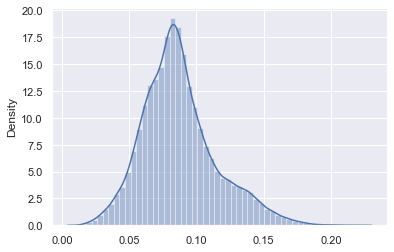

In [175]:
# Plotting the distribution of predictions
df_real                      = sm.add_constant(df_real)
test_inputs                  = df_real
real_data_results            = results_log.predict(test_inputs)
sns.distplot(real_data_results)

In [176]:
# Implementing the K-Nearest Neighbor Classification Method
from sklearn.neighbors import KNeighborsClassifier
# Selecting the ideal amount of neighbors
KNNclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier.fit(x_train, y_train)

KNeighborsClassifier()

In [177]:
# Testing the results and printing the confusion matrix and model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
knn_y_predict = KNNclassifier.predict(x_test)
knn_cm = confusion_matrix(y_test, knn_y_predict)
print(knn_cm)
print('The KNN Method Accuracy is', 100*accuracy_score(y_test, knn_y_predict), '%')

[[67949   566]
 [ 6086   125]]
The KNN Method Accuracy is 91.0981452238846 %


In [195]:
# Testing the results on the real data
knn_real_data_prediction         = KNNclassifier.predict(df_real)
knn_real_data_results            = pd.DataFrame(knn_real_data_prediction, columns = ['Results'])
knn_real_data_results['Results'] = knn_real_data_results['Results'].map({0 : 'No Payment Difficulties', 1 : 'Has Payment Difficulties'})
knn_real_data_results['Count']   = 1
aggregated_knn_results           = knn_real_data_results.groupby('Results').count().reset_index()
aggregated_knn_results

,Results,Count
0,Has Payment Difficulties,483
1,No Payment Difficulties,46456
